# Project 7

## Sys Ops

In [ ]:
cd ..

In [ ]:
pwd

## Imports 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

from sklearn.feature_selection import *
from sklearn.feature_extraction import *
from sklearn.decomposition import *
from sklearn.model_selection import *
from sklearn.impute import *
from sklearn.preprocessing import *
from sklearn.pipeline import *
from sklearn.covariance import *
from sklearn.metrics import *
from sklearn.compose import *

from sklearn.dummy import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.cluster import *

In [ ]:
# DO NOT REMOVE THIS LINE

## Data

In [8]:
fn = "rudy_home_credit.csv"
df = pd.read_csv("./data/source/" + fn)

In [9]:
df.shape

(594, 122)

In [10]:
df = df.sample(frac=0.10)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
446,142708,0,Cash loans,M,N,N,0,225000.0,454500.0,21996.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
344,191922,0,Cash loans,M,Y,Y,1,225000.0,983299.5,41661.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
567,343302,0,Cash loans,F,N,N,1,112500.0,675000.0,21906.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365,281015,0,Cash loans,F,Y,Y,0,270000.0,1305000.0,36018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
572,356350,0,Cash loans,F,Y,N,0,112500.0,331920.0,16096.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
85,198976,0,Cash loans,F,N,Y,0,135000.0,728460.0,38938.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,429892,0,Cash loans,M,Y,Y,0,270000.0,927252.0,27243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27,277038,0,Cash loans,M,Y,Y,2,225000.0,402214.5,25834.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
131,118646,0,Cash loans,M,Y,N,1,135000.0,1125000.0,47794.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
26,423857,0,Cash loans,F,N,N,1,112500.0,1350000.0,39474.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0


In [11]:
# filter for correl
# df = df.filter(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
#                'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
#                ])

df = df.filter(
    [
        "TARGET",
        "NAME_CONTRACT_TYPE",
        "CODE_GENDER",
        "FLAG_OWN_CAR",
        "FLAG_OWN_REALTY",
        "CNT_CHILDREN",
        "AMT_INCOME_TOTAL",
        "AMT_CREDIT",
        "AMT_ANNUITY",
        "AMT_GOODS_PRICE",
        "NAME_TYPE_SUITE",
        "NAME_INCOME_TYPE",
        "NAME_EDUCATION_TYPE",
        "NAME_FAMILY_STATUS",
        "NAME_HOUSING_TYPE",
        "DAYS_BIRTH",
        "DAYS_EMPLOYED",
        "ORGANIZATION_TYPE",
        "OCCUPATION_TYPE",
        "EXT_SOURCE_1",
        "EXT_SOURCE_2",
        "EXT_SOURCE_3",
    ]
)


df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
446,0,Cash loans,M,N,N,0,225000.0,454500.0,21996.0,454500.0,...,Higher education,Civil marriage,House / apartment,-19306,-886,Business Entity Type 3,Laborers,0.651477,0.698867,0.436506
344,0,Cash loans,M,Y,Y,1,225000.0,983299.5,41661.0,904500.0,...,Secondary / secondary special,Married,House / apartment,-20058,-4292,Housing,Laborers,0.624841,0.729282,0.750375
567,0,Cash loans,F,N,N,1,112500.0,675000.0,21906.0,675000.0,...,Secondary / secondary special,Married,House / apartment,-12730,-878,Business Entity Type 3,Cooking staff,0.321825,0.666491,0.440058
365,0,Cash loans,F,Y,Y,0,270000.0,1305000.0,36018.0,1305000.0,...,Secondary / secondary special,Married,House / apartment,-11242,-2206,Medicine,Medicine staff,0.157460,0.527576,0.317032
572,0,Cash loans,F,Y,N,0,112500.0,331920.0,16096.5,225000.0,...,Higher education,Married,Co-op apartment,-17055,-594,Medicine,NaN,NaN,0.677571,0.418854
85,0,Cash loans,F,N,Y,0,135000.0,728460.0,38938.5,675000.0,...,Secondary / secondary special,Single / not married,House / apartment,-16960,-10285,Industry: type 11,High skill tech staff,NaN,0.641324,0.331251
7,0,Cash loans,M,Y,Y,0,270000.0,927252.0,27243.0,774000.0,...,Secondary / secondary special,Married,House / apartment,-17221,-5118,Business Entity Type 2,NaN,NaN,0.558836,0.627991
27,0,Cash loans,M,Y,Y,2,225000.0,402214.5,25834.5,328500.0,...,Secondary / secondary special,Married,House / apartment,-13902,-836,Other,Managers,0.643129,0.533779,0.404878
131,0,Cash loans,M,Y,N,1,135000.0,1125000.0,47794.5,1125000.0,...,Secondary / secondary special,Married,House / apartment,-10714,-392,Transport: type 3,Drivers,NaN,0.759216,NaN
26,0,Cash loans,F,N,N,1,112500.0,1350000.0,39474.0,1350000.0,...,Higher education,Married,With parents,-10575,-1819,Business Entity Type 3,Accountants,0.512700,0.717464,0.323311


## EDA Exploratory Data Analysis

In [12]:
df.sort_values("AMT_INCOME_TOTAL", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
504,0,Cash loans,F,N,Y,0,360000.0,785398.5,31275.0,702000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-22167,365243,XNA,NaN,0.697622,0.228814,NaN
221,0,Cash loans,M,Y,Y,0,360000.0,790830.0,62613.0,675000.0,...,Higher education,Married,House / apartment,-10266,-507,Trade: type 3,Managers,0.424164,0.612592,0.186293
130,0,Cash loans,F,N,N,1,315000.0,225000.0,11560.5,225000.0,...,Higher education,Married,House / apartment,-11034,-290,Bank,Accountants,0.381555,0.505124,0.379100
365,0,Cash loans,F,Y,Y,0,270000.0,1305000.0,36018.0,1305000.0,...,Secondary / secondary special,Married,House / apartment,-11242,-2206,Medicine,Medicine staff,0.157460,0.527576,0.317032
7,0,Cash loans,M,Y,Y,0,270000.0,927252.0,27243.0,774000.0,...,Secondary / secondary special,Married,House / apartment,-17221,-5118,Business Entity Type 2,NaN,NaN,0.558836,0.627991
87,0,Cash loans,F,Y,Y,1,270000.0,127350.0,13500.0,112500.0,...,Higher education,Married,House / apartment,-11448,-1145,Services,Managers,0.496491,0.552233,0.320163
580,0,Cash loans,M,Y,Y,0,270000.0,1125000.0,36292.5,1125000.0,...,Higher education,Single / not married,House / apartment,-13966,-2961,Business Entity Type 3,Managers,NaN,0.582821,NaN
411,0,Cash loans,F,N,Y,0,261000.0,1546020.0,42642.0,1350000.0,...,Secondary / secondary special,Single / not married,House / apartment,-16396,-1124,Self-employed,Sales staff,NaN,0.521648,0.466864
446,0,Cash loans,M,N,N,0,225000.0,454500.0,21996.0,454500.0,...,Higher education,Civil marriage,House / apartment,-19306,-886,Business Entity Type 3,Laborers,0.651477,0.698867,0.436506
344,0,Cash loans,M,Y,Y,1,225000.0,983299.5,41661.0,904500.0,...,Secondary / secondary special,Married,House / apartment,-20058,-4292,Housing,Laborers,0.624841,0.729282,0.750375


In [13]:
df.sort_values("AMT_CREDIT", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
411,0,Cash loans,F,N,Y,0,261000.0,1546020.0,42642.0,1350000.0,...,Secondary / secondary special,Single / not married,House / apartment,-16396,-1124,Self-employed,Sales staff,NaN,0.521648,0.466864
379,0,Cash loans,M,N,Y,0,180000.0,1354500.0,35860.5,1354500.0,...,Higher education,Married,House / apartment,-18316,-1128,Trade: type 7,Accountants,0.507361,0.529783,0.520898
26,0,Cash loans,F,N,N,1,112500.0,1350000.0,39474.0,1350000.0,...,Higher education,Married,With parents,-10575,-1819,Business Entity Type 3,Accountants,0.512700,0.717464,0.323311
365,0,Cash loans,F,Y,Y,0,270000.0,1305000.0,36018.0,1305000.0,...,Secondary / secondary special,Married,House / apartment,-11242,-2206,Medicine,Medicine staff,0.157460,0.527576,0.317032
271,1,Cash loans,F,N,Y,0,135000.0,1125000.0,30168.0,1125000.0,...,Secondary / secondary special,Widow,House / apartment,-22069,365243,XNA,NaN,NaN,0.766784,0.576209
580,0,Cash loans,M,Y,Y,0,270000.0,1125000.0,36292.5,1125000.0,...,Higher education,Single / not married,House / apartment,-13966,-2961,Business Entity Type 3,Managers,NaN,0.582821,NaN
131,0,Cash loans,M,Y,N,1,135000.0,1125000.0,47794.5,1125000.0,...,Secondary / secondary special,Married,House / apartment,-10714,-392,Transport: type 3,Drivers,NaN,0.759216,NaN
344,0,Cash loans,M,Y,Y,1,225000.0,983299.5,41661.0,904500.0,...,Secondary / secondary special,Married,House / apartment,-20058,-4292,Housing,Laborers,0.624841,0.729282,0.750375
7,0,Cash loans,M,Y,Y,0,270000.0,927252.0,27243.0,774000.0,...,Secondary / secondary special,Married,House / apartment,-17221,-5118,Business Entity Type 2,NaN,NaN,0.558836,0.627991
451,0,Cash loans,F,N,N,0,112500.0,819432.0,24088.5,684000.0,...,Higher education,Widow,Municipal apartment,-23181,-730,Self-employed,Sales staff,NaN,0.660103,0.477649


In [14]:
df.sort_values("AMT_ANNUITY", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
387,0,Cash loans,F,N,N,2,180000.0,743031.0,72513.0,688500.0,...,Higher education,Married,House / apartment,-11515,-1988,Other,NaN,0.688000,0.153884,0.542445
221,0,Cash loans,M,Y,Y,0,360000.0,790830.0,62613.0,675000.0,...,Higher education,Married,House / apartment,-10266,-507,Trade: type 3,Managers,0.424164,0.612592,0.186293
131,0,Cash loans,M,Y,N,1,135000.0,1125000.0,47794.5,1125000.0,...,Secondary / secondary special,Married,House / apartment,-10714,-392,Transport: type 3,Drivers,NaN,0.759216,NaN
411,0,Cash loans,F,N,Y,0,261000.0,1546020.0,42642.0,1350000.0,...,Secondary / secondary special,Single / not married,House / apartment,-16396,-1124,Self-employed,Sales staff,NaN,0.521648,0.466864
499,0,Cash loans,F,N,Y,1,225000.0,752116.5,41994.0,688500.0,...,Higher education,Single / not married,With parents,-14739,-4952,Medicine,NaN,0.814606,0.691220,0.443615
344,0,Cash loans,M,Y,Y,1,225000.0,983299.5,41661.0,904500.0,...,Secondary / secondary special,Married,House / apartment,-20058,-4292,Housing,Laborers,0.624841,0.729282,0.750375
26,0,Cash loans,F,N,N,1,112500.0,1350000.0,39474.0,1350000.0,...,Higher education,Married,With parents,-10575,-1819,Business Entity Type 3,Accountants,0.512700,0.717464,0.323311
85,0,Cash loans,F,N,Y,0,135000.0,728460.0,38938.5,675000.0,...,Secondary / secondary special,Single / not married,House / apartment,-16960,-10285,Industry: type 11,High skill tech staff,NaN,0.641324,0.331251
158,0,Cash loans,F,Y,Y,1,180000.0,684751.5,38236.5,634500.0,...,Higher education,Married,Municipal apartment,-15055,-3770,Business Entity Type 2,High skill tech staff,0.440650,0.639476,NaN
224,0,Cash loans,F,N,Y,2,157500.0,469152.0,37746.0,405000.0,...,Secondary / secondary special,Married,House / apartment,-11541,-2437,Services,Private service staff,0.256724,0.158206,0.391055


In [15]:
df.sort_values("AMT_GOODS_PRICE", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
379,0,Cash loans,M,N,Y,0,180000.0,1354500.0,35860.5,1354500.0,...,Higher education,Married,House / apartment,-18316,-1128,Trade: type 7,Accountants,0.507361,0.529783,0.520898
411,0,Cash loans,F,N,Y,0,261000.0,1546020.0,42642.0,1350000.0,...,Secondary / secondary special,Single / not married,House / apartment,-16396,-1124,Self-employed,Sales staff,NaN,0.521648,0.466864
26,0,Cash loans,F,N,N,1,112500.0,1350000.0,39474.0,1350000.0,...,Higher education,Married,With parents,-10575,-1819,Business Entity Type 3,Accountants,0.512700,0.717464,0.323311
365,0,Cash loans,F,Y,Y,0,270000.0,1305000.0,36018.0,1305000.0,...,Secondary / secondary special,Married,House / apartment,-11242,-2206,Medicine,Medicine staff,0.157460,0.527576,0.317032
580,0,Cash loans,M,Y,Y,0,270000.0,1125000.0,36292.5,1125000.0,...,Higher education,Single / not married,House / apartment,-13966,-2961,Business Entity Type 3,Managers,NaN,0.582821,NaN
271,1,Cash loans,F,N,Y,0,135000.0,1125000.0,30168.0,1125000.0,...,Secondary / secondary special,Widow,House / apartment,-22069,365243,XNA,NaN,NaN,0.766784,0.576209
131,0,Cash loans,M,Y,N,1,135000.0,1125000.0,47794.5,1125000.0,...,Secondary / secondary special,Married,House / apartment,-10714,-392,Transport: type 3,Drivers,NaN,0.759216,NaN
344,0,Cash loans,M,Y,Y,1,225000.0,983299.5,41661.0,904500.0,...,Secondary / secondary special,Married,House / apartment,-20058,-4292,Housing,Laborers,0.624841,0.729282,0.750375
7,0,Cash loans,M,Y,Y,0,270000.0,927252.0,27243.0,774000.0,...,Secondary / secondary special,Married,House / apartment,-17221,-5118,Business Entity Type 2,NaN,NaN,0.558836,0.627991
504,0,Cash loans,F,N,Y,0,360000.0,785398.5,31275.0,702000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-22167,365243,XNA,NaN,0.697622,0.228814,NaN


In [16]:
# on exclut ces lignes car elles font planter le fit

df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Businessman')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Maternity leave')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Student')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Unemployed')].index)

df = df.drop(df[(df['NAME_FAMILY_STATUS'] == 'Unknown')].index)

df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
446,0,Cash loans,M,N,N,0,225000.0,454500.0,21996.0,454500.0,...,Higher education,Civil marriage,House / apartment,-19306,-886,Business Entity Type 3,Laborers,0.651477,0.698867,0.436506
344,0,Cash loans,M,Y,Y,1,225000.0,983299.5,41661.0,904500.0,...,Secondary / secondary special,Married,House / apartment,-20058,-4292,Housing,Laborers,0.624841,0.729282,0.750375
567,0,Cash loans,F,N,N,1,112500.0,675000.0,21906.0,675000.0,...,Secondary / secondary special,Married,House / apartment,-12730,-878,Business Entity Type 3,Cooking staff,0.321825,0.666491,0.440058
365,0,Cash loans,F,Y,Y,0,270000.0,1305000.0,36018.0,1305000.0,...,Secondary / secondary special,Married,House / apartment,-11242,-2206,Medicine,Medicine staff,0.157460,0.527576,0.317032
572,0,Cash loans,F,Y,N,0,112500.0,331920.0,16096.5,225000.0,...,Higher education,Married,Co-op apartment,-17055,-594,Medicine,NaN,NaN,0.677571,0.418854
85,0,Cash loans,F,N,Y,0,135000.0,728460.0,38938.5,675000.0,...,Secondary / secondary special,Single / not married,House / apartment,-16960,-10285,Industry: type 11,High skill tech staff,NaN,0.641324,0.331251
7,0,Cash loans,M,Y,Y,0,270000.0,927252.0,27243.0,774000.0,...,Secondary / secondary special,Married,House / apartment,-17221,-5118,Business Entity Type 2,NaN,NaN,0.558836,0.627991
27,0,Cash loans,M,Y,Y,2,225000.0,402214.5,25834.5,328500.0,...,Secondary / secondary special,Married,House / apartment,-13902,-836,Other,Managers,0.643129,0.533779,0.404878
131,0,Cash loans,M,Y,N,1,135000.0,1125000.0,47794.5,1125000.0,...,Secondary / secondary special,Married,House / apartment,-10714,-392,Transport: type 3,Drivers,NaN,0.759216,NaN
26,0,Cash loans,F,N,N,1,112500.0,1350000.0,39474.0,1350000.0,...,Higher education,Married,With parents,-10575,-1819,Business Entity Type 3,Accountants,0.512700,0.717464,0.323311


In [17]:
df.sort_values("DAYS_BIRTH", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
284,0,Revolving loans,F,Y,N,0,67500.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Civil marriage,With parents,-8316,-219,Business Entity Type 3,Sales staff,0.286906,0.595607,NaN
312,1,Cash loans,F,N,Y,0,135000.0,312768.0,28813.5,270000.0,...,Incomplete higher,Civil marriage,House / apartment,-8594,-369,Business Entity Type 3,HR staff,0.303424,0.259984,NaN
383,0,Cash loans,M,N,N,0,135000.0,364356.0,18733.5,261000.0,...,Secondary / secondary special,Single / not married,House / apartment,-9167,-947,Business Entity Type 3,Cooking staff,NaN,0.346872,0.159520
574,0,Revolving loans,M,Y,N,0,202500.0,225000.0,11250.0,225000.0,...,Secondary / secondary special,Single / not married,With parents,-9797,-2448,Industry: type 9,Laborers,0.181490,0.567712,0.418854
201,0,Revolving loans,F,N,Y,2,112500.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Married,House / apartment,-9894,-1505,Military,Laborers,NaN,0.000730,0.370650
221,0,Cash loans,M,Y,Y,0,360000.0,790830.0,62613.0,675000.0,...,Higher education,Married,House / apartment,-10266,-507,Trade: type 3,Managers,0.424164,0.612592,0.186293
267,0,Cash loans,F,N,N,0,81000.0,450000.0,13774.5,450000.0,...,Higher education,Single / not married,House / apartment,-10444,-2054,Government,Managers,0.466980,0.564790,0.484851
26,0,Cash loans,F,N,N,1,112500.0,1350000.0,39474.0,1350000.0,...,Higher education,Married,With parents,-10575,-1819,Business Entity Type 3,Accountants,0.512700,0.717464,0.323311
131,0,Cash loans,M,Y,N,1,135000.0,1125000.0,47794.5,1125000.0,...,Secondary / secondary special,Married,House / apartment,-10714,-392,Transport: type 3,Drivers,NaN,0.759216,NaN
130,0,Cash loans,F,N,N,1,315000.0,225000.0,11560.5,225000.0,...,Higher education,Married,House / apartment,-11034,-290,Bank,Accountants,0.381555,0.505124,0.379100


In [18]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
543,0,Cash loans,F,N,Y,0,135000.0,284400.0,16326.0,225000.0,...,Secondary / secondary special,Separated,House / apartment,-24189,365243,XNA,NaN,NaN,0.593773,0.590233
416,0,Cash loans,F,Y,Y,0,76500.0,573628.5,25398.0,463500.0,...,Secondary / secondary special,Married,House / apartment,-21564,365243,XNA,NaN,NaN,0.355231,0.647977
541,0,Cash loans,F,N,Y,0,94500.0,408780.0,15538.5,337500.0,...,Secondary / secondary special,Widow,House / apartment,-22193,365243,XNA,NaN,NaN,0.261493,0.610991
271,1,Cash loans,F,N,Y,0,135000.0,1125000.0,30168.0,1125000.0,...,Secondary / secondary special,Widow,House / apartment,-22069,365243,XNA,NaN,NaN,0.766784,0.576209
296,0,Cash loans,F,N,Y,0,76500.0,121500.0,11965.5,121500.0,...,Secondary / secondary special,Separated,House / apartment,-24187,365243,XNA,NaN,NaN,0.597081,NaN
511,0,Cash loans,F,N,N,0,112500.0,791532.0,23274.0,567000.0,...,Secondary / secondary special,Widow,House / apartment,-22851,365243,XNA,NaN,NaN,0.211163,NaN
571,0,Cash loans,F,N,Y,0,90000.0,675000.0,22437.0,675000.0,...,Secondary / secondary special,Married,House / apartment,-22451,365243,XNA,NaN,NaN,0.681950,0.751724
504,0,Cash loans,F,N,Y,0,360000.0,785398.5,31275.0,702000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-22167,365243,XNA,NaN,0.697622,0.228814,NaN
243,0,Cash loans,M,N,Y,0,90000.0,634482.0,18310.5,454500.0,...,Secondary / secondary special,Married,House / apartment,-22713,365243,XNA,NaN,NaN,0.123898,0.863363
286,0,Cash loans,M,Y,Y,0,126000.0,247675.5,19579.5,229500.0,...,Higher education,Married,House / apartment,-12033,-205,Security Ministries,Core staff,NaN,0.310359,0.345785


In [19]:
df.loc[df["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = float("NaN")

In [20]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
286,0,Cash loans,M,Y,Y,0,126000.0,247675.5,19579.5,229500.0,...,Higher education,Married,House / apartment,-12033,-205.0,Security Ministries,Core staff,NaN,0.310359,0.345785
284,0,Revolving loans,F,Y,N,0,67500.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Civil marriage,With parents,-8316,-219.0,Business Entity Type 3,Sales staff,0.286906,0.595607,NaN
130,0,Cash loans,F,N,N,1,315000.0,225000.0,11560.5,225000.0,...,Higher education,Married,House / apartment,-11034,-290.0,Bank,Accountants,0.381555,0.505124,0.379100
380,0,Cash loans,F,Y,N,0,157500.0,770292.0,30676.5,688500.0,...,Higher education,Married,House / apartment,-21882,-318.0,Industry: type 7,Laborers,0.593211,0.709678,0.675413
581,1,Cash loans,M,N,N,0,67500.0,469017.0,25573.5,391500.0,...,Secondary / secondary special,Single / not married,With parents,-12750,-324.0,Trade: type 7,Low-skill Laborers,NaN,0.291538,NaN
305,0,Revolving loans,M,N,Y,0,67500.0,247500.0,12375.0,247500.0,...,Higher education,Civil marriage,House / apartment,-21453,-363.0,Business Entity Type 1,Laborers,0.682402,0.418045,0.838725
312,1,Cash loans,F,N,Y,0,135000.0,312768.0,28813.5,270000.0,...,Incomplete higher,Civil marriage,House / apartment,-8594,-369.0,Business Entity Type 3,HR staff,0.303424,0.259984,NaN
131,0,Cash loans,M,Y,N,1,135000.0,1125000.0,47794.5,1125000.0,...,Secondary / secondary special,Married,House / apartment,-10714,-392.0,Transport: type 3,Drivers,NaN,0.759216,NaN
221,0,Cash loans,M,Y,Y,0,360000.0,790830.0,62613.0,675000.0,...,Higher education,Married,House / apartment,-10266,-507.0,Trade: type 3,Managers,0.424164,0.612592,0.186293
572,0,Cash loans,F,Y,N,0,112500.0,331920.0,16096.5,225000.0,...,Higher education,Married,Co-op apartment,-17055,-594.0,Medicine,NaN,NaN,0.677571,0.418854


In [21]:
df.sort_values("DAYS_EMPLOYED", ascending=True)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
85,0,Cash loans,F,N,Y,0,135000.0,728460.0,38938.5,675000.0,...,Secondary / secondary special,Single / not married,House / apartment,-16960,-10285.0,Industry: type 11,High skill tech staff,NaN,0.641324,0.331251
391,0,Revolving loans,F,Y,N,1,63000.0,202500.0,10125.0,202500.0,...,Secondary / secondary special,Separated,House / apartment,-14745,-6943.0,Business Entity Type 2,High skill tech staff,0.745314,0.276615,NaN
212,0,Cash loans,M,Y,Y,1,211500.0,451102.5,23031.0,337500.0,...,Higher education,Married,House / apartment,-17684,-5394.0,Construction,High skill tech staff,0.283888,0.649402,0.659406
324,0,Cash loans,F,Y,Y,0,175500.0,229500.0,8779.5,229500.0,...,Secondary / secondary special,Civil marriage,House / apartment,-16467,-5266.0,Self-employed,Core staff,0.784447,0.689518,0.106156
59,0,Revolving loans,F,N,Y,1,157500.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Single / not married,House / apartment,-12506,-5181.0,Self-employed,Sales staff,NaN,0.370421,0.202087
7,0,Cash loans,M,Y,Y,0,270000.0,927252.0,27243.0,774000.0,...,Secondary / secondary special,Married,House / apartment,-17221,-5118.0,Business Entity Type 2,NaN,NaN,0.558836,0.627991
499,0,Cash loans,F,N,Y,1,225000.0,752116.5,41994.0,688500.0,...,Higher education,Single / not married,With parents,-14739,-4952.0,Medicine,NaN,0.814606,0.691220,0.443615
344,0,Cash loans,M,Y,Y,1,225000.0,983299.5,41661.0,904500.0,...,Secondary / secondary special,Married,House / apartment,-20058,-4292.0,Housing,Laborers,0.624841,0.729282,0.750375
21,0,Cash loans,F,Y,Y,1,90000.0,508495.5,21672.0,454500.0,...,Secondary / secondary special,Widow,House / apartment,-14390,-4071.0,Other,Medicine staff,0.313862,0.648844,0.000527
10,0,Cash loans,F,N,Y,2,162000.0,187704.0,10903.5,148500.0,...,Secondary / secondary special,Married,House / apartment,-14463,-3966.0,Kindergarten,Core staff,0.326688,0.449989,0.387625


In [22]:
df.loc[df["ORGANIZATION_TYPE"] == "XNA", "ORGANIZATION_TYPE"] = float("NaN")

In [23]:
df.TARGET.value_counts(normalize=True)

TARGET
0    0.932203
1    0.067797
Name: proportion, dtype: float64

In [24]:
df.TARGET.value_counts()

TARGET
0    55
1     4
Name: count, dtype: int64

In [25]:
# Transformations

df.loc[df["CODE_GENDER"] == "M", "CODE_GENDER"] = 1
df.loc[df["CODE_GENDER"] == "F", "CODE_GENDER"] = 2
df.loc[df["CODE_GENDER"] == "XNA", "CODE_GENDER"] = 2

# on transforme la colonne CODE_GENDER en int
df.CODE_GENDER = df.CODE_GENDER.astype("int")

df.loc[df["FLAG_OWN_CAR"] == "Y", "FLAG_OWN_CAR"] = 1
df.loc[df["FLAG_OWN_CAR"] == "N", "FLAG_OWN_CAR"] = 0

# on transforme la colonne FLAG_OWN_CAR en int
df.FLAG_OWN_CAR = df.FLAG_OWN_CAR.astype("int")

df.loc[df["FLAG_OWN_REALTY"] == "Y", "FLAG_OWN_REALTY"] = 1
df.loc[df["FLAG_OWN_REALTY"] == "N", "FLAG_OWN_REALTY"] = 0

# on transforme la colonne FLAG_OWN_REALTY en int
df.FLAG_OWN_REALTY = df.FLAG_OWN_REALTY.astype("int")

df.DAYS_BIRTH = -df.DAYS_BIRTH / 365
df.DAYS_EMPLOYED = -df.DAYS_EMPLOYED / 365

df.dtypes

TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER              int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
ORGANIZATION_TYPE       object
OCCUPATION_TYPE         object
EXT_SOURCE_1           float64
EXT_SOURCE_2           float64
EXT_SOURCE_3           float64
dtype: object

In [26]:
df.isna().mean()

TARGET                 0.000000
NAME_CONTRACT_TYPE     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
AMT_CREDIT             0.000000
AMT_ANNUITY            0.000000
AMT_GOODS_PRICE        0.000000
NAME_TYPE_SUITE        0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.152542
ORGANIZATION_TYPE      0.152542
OCCUPATION_TYPE        0.254237
EXT_SOURCE_1           0.457627
EXT_SOURCE_2           0.000000
EXT_SOURCE_3           0.203390
dtype: float64

In [27]:
df.select_dtypes(include="object").nunique()

NAME_CONTRACT_TYPE      2
NAME_TYPE_SUITE         3
NAME_INCOME_TYPE        4
NAME_EDUCATION_TYPE     3
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       4
ORGANIZATION_TYPE      21
OCCUPATION_TYPE        13
dtype: int64

In [28]:
df["nan_EXT_SOURCE_1"] = df.EXT_SOURCE_1.isna().astype("int")

# on exclut ORGANIZATION_TYPE, OCCUPATION_TYPE, EXT_SOURCE_1 car trop de NaN
df.drop(
    columns=["ORGANIZATION_TYPE", "OCCUPATION_TYPE", "EXT_SOURCE_1"],
    inplace=True,
    errors="ignore",
)

df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
446,0,Cash loans,1,0,0,0,225000.0,454500.0,21996.0,454500.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,52.893151,2.427397,0.698867,0.436506,0
344,0,Cash loans,1,1,1,1,225000.0,983299.5,41661.0,904500.0,"Spouse, partner",Commercial associate,Secondary / secondary special,Married,House / apartment,54.953425,11.758904,0.729282,0.750375,0
567,0,Cash loans,2,0,0,1,112500.0,675000.0,21906.0,675000.0,"Spouse, partner",Commercial associate,Secondary / secondary special,Married,House / apartment,34.876712,2.405479,0.666491,0.440058,0
365,0,Cash loans,2,1,1,0,270000.0,1305000.0,36018.0,1305000.0,Family,State servant,Secondary / secondary special,Married,House / apartment,30.800000,6.043836,0.527576,0.317032,0
572,0,Cash loans,2,1,0,0,112500.0,331920.0,16096.5,225000.0,Unaccompanied,State servant,Higher education,Married,Co-op apartment,46.726027,1.627397,0.677571,0.418854,1


In [29]:
# df.corr()

In [30]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
446,0,Cash loans,1,0,0,0,225000.0,454500.0,21996.0,454500.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,52.893151,2.427397,0.698867,0.436506,0
344,0,Cash loans,1,1,1,1,225000.0,983299.5,41661.0,904500.0,"Spouse, partner",Commercial associate,Secondary / secondary special,Married,House / apartment,54.953425,11.758904,0.729282,0.750375,0
567,0,Cash loans,2,0,0,1,112500.0,675000.0,21906.0,675000.0,"Spouse, partner",Commercial associate,Secondary / secondary special,Married,House / apartment,34.876712,2.405479,0.666491,0.440058,0
365,0,Cash loans,2,1,1,0,270000.0,1305000.0,36018.0,1305000.0,Family,State servant,Secondary / secondary special,Married,House / apartment,30.800000,6.043836,0.527576,0.317032,0
572,0,Cash loans,2,1,0,0,112500.0,331920.0,16096.5,225000.0,Unaccompanied,State servant,Higher education,Married,Co-op apartment,46.726027,1.627397,0.677571,0.418854,1
85,0,Cash loans,2,0,1,0,135000.0,728460.0,38938.5,675000.0,Unaccompanied,State servant,Secondary / secondary special,Single / not married,House / apartment,46.465753,28.178082,0.641324,0.331251,1
7,0,Cash loans,1,1,1,0,270000.0,927252.0,27243.0,774000.0,Family,Working,Secondary / secondary special,Married,House / apartment,47.180822,14.021918,0.558836,0.627991,1
27,0,Cash loans,1,1,1,2,225000.0,402214.5,25834.5,328500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,38.087671,2.290411,0.533779,0.404878,0
131,0,Cash loans,1,1,0,1,135000.0,1125000.0,47794.5,1125000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,29.353425,1.073973,0.759216,NaN,1
26,0,Cash loans,2,0,0,1,112500.0,1350000.0,39474.0,1350000.0,Unaccompanied,Working,Higher education,Married,With parents,28.972603,4.983562,0.717464,0.323311,0


<Axes: >

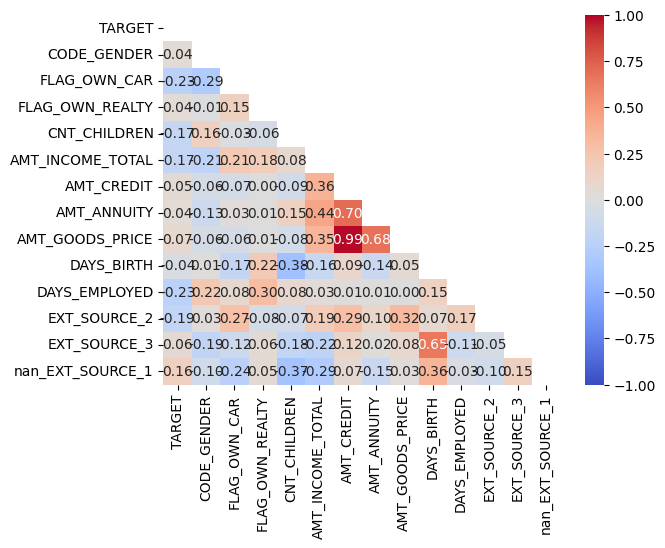

In [31]:
corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask)

In [32]:
# on construit la matrice X des Features
X = df.drop(columns="TARGET")
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
446,Cash loans,1,0,0,0,225000.0,454500.0,21996.0,454500.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,52.893151,2.427397,0.698867,0.436506,0
344,Cash loans,1,1,1,1,225000.0,983299.5,41661.0,904500.0,"Spouse, partner",Commercial associate,Secondary / secondary special,Married,House / apartment,54.953425,11.758904,0.729282,0.750375,0
567,Cash loans,2,0,0,1,112500.0,675000.0,21906.0,675000.0,"Spouse, partner",Commercial associate,Secondary / secondary special,Married,House / apartment,34.876712,2.405479,0.666491,0.440058,0
365,Cash loans,2,1,1,0,270000.0,1305000.0,36018.0,1305000.0,Family,State servant,Secondary / secondary special,Married,House / apartment,30.800000,6.043836,0.527576,0.317032,0
572,Cash loans,2,1,0,0,112500.0,331920.0,16096.5,225000.0,Unaccompanied,State servant,Higher education,Married,Co-op apartment,46.726027,1.627397,0.677571,0.418854,1
85,Cash loans,2,0,1,0,135000.0,728460.0,38938.5,675000.0,Unaccompanied,State servant,Secondary / secondary special,Single / not married,House / apartment,46.465753,28.178082,0.641324,0.331251,1
7,Cash loans,1,1,1,0,270000.0,927252.0,27243.0,774000.0,Family,Working,Secondary / secondary special,Married,House / apartment,47.180822,14.021918,0.558836,0.627991,1
27,Cash loans,1,1,1,2,225000.0,402214.5,25834.5,328500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,38.087671,2.290411,0.533779,0.404878,0
131,Cash loans,1,1,0,1,135000.0,1125000.0,47794.5,1125000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,29.353425,1.073973,0.759216,NaN,1
26,Cash loans,2,0,0,1,112500.0,1350000.0,39474.0,1350000.0,Unaccompanied,Working,Higher education,Married,With parents,28.972603,4.983562,0.717464,0.323311,0


In [33]:
# On construit l vecteur y des Targets
y = df["TARGET"]
y

446    0
344    0
567    0
365    0
572    0
85     0
7      0
27     0
131    0
26     0
306    0
511    0
543    0
411    0
101    0
499    0
296    0
357    0
332    0
201    0
0      0
221    0
21     0
571    0
89     1
224    0
219    0
387    0
541    0
305    0
271    1
380    0
451    0
581    1
74     0
267    0
130    0
286    0
133    0
268    0
324    0
580    0
284    0
87     0
283    0
312    1
574    0
391    0
158    0
187    0
212    0
416    0
379    0
551    0
383    0
59     0
243    0
504    0
10     0
Name: TARGET, dtype: int64

In [34]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
df.to_csv("./data/preprocessed/rudy_home_credit.csv", index=False)

In [35]:
def resultize(grid, verbose=2):
    """make results based on gridsearchcv"""

    # make df
    results = pd.DataFrame(grid.cv_results_)

    # clean columns
    cols = [i for i in results.columns if not i.startswith("split")]
    results = results.loc[:, cols]

    if verbose == 2:
        print("coucou")

    return results.round(2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

## Modelisation

### Refactoring avec utilisation de Pipeline 

### Création du ColumnTransformer

In [ ]:
numerical_features = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    # "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
]

categorical_features = [
    "NAME_CONTRACT_TYPE",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    # "OCCUPATION_TYPE",
    # "ORGANIZATION_TYPE",
]

In [ ]:
# Création de 2 Pipelines

numerical_pipeline = make_pipeline(KNNImputer(), StandardScaler())

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder()
)

In [ ]:
# Création du ColumnTransformer
# numerical_pipeline est appliquée sur les numerical_features
# categorical_pipeline est appliquée sur les categorical_features

ColumnTransformer = make_column_transformer(
    (numerical_pipeline, numerical_features),
    (categorical_pipeline, categorical_features),
)
ColumnTransformer

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

pipe = Pipeline(
    [
        ("columntransformer", ColumnTransformer),
        #  ("inputer", KNNImputer()),
        #  ("scaler", StandardScaler()),
        ('under_sampler', RandomUnderSampler()),
        ("estimator", DummyClassifier()),
    ]
)

In [ ]:
param_grid = {
    "estimator": [
        DummyClassifier(),
        LogisticRegression(),
        RandomForestClassifier(),
    ],
}

In [ ]:
grid2 = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
    error_score='raise'
)
grid2

In [ ]:
grid2.fit(X_train, y_train)

In [ ]:
resultize(grid2)

In [ ]:
grid2.cv_results_